In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,AveragePooling2D,Dropout,Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import pandas as pd

In [23]:
train_dir = 'dataset'

In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.2)


In [25]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary',
                                                subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64,64),
        batch_size=32,
        class_mode='binary',
        subset='validation')

Found 3067 images belonging to 2 classes.
Found 766 images belonging to 2 classes.


In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(128 , kernel_size=(3,3) , activation='relu' , input_shape=(64,64,3)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [28]:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

In [29]:
model.add(Dropout(0.25))

In [30]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
batch_size = 32
model_info = model.fit_generator(train_generator,
                                steps_per_epoch = train_generator.samples // batch_size,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.samples // batch_size,
                                epochs=45)

Epoch 1/45
14/95 [===>..........................] - ETA: 45s - loss: 0.8167 - acc: 0.5781

C:\Users\Deepanshu Somani\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


95/95 [==============================] - 63s 663ms/step - loss: 0.3860 - acc: 0.8320 - val_loss: 0.1767 - val_acc: 0.9239
Epoch 2/45
95/95 [==============================] - 24s 257ms/step - loss: 0.2218 - acc: 0.9189 - val_loss: 0.1245 - val_acc: 0.9592
Epoch 3/45
95/95 [==============================] - 24s 257ms/step - loss: 0.2419 - acc: 0.9074 - val_loss: 0.1788 - val_acc: 0.9348
Epoch 4/45
95/95 [==============================] - 25s 259ms/step - loss: 0.1872 - acc: 0.9269 - val_loss: 0.0954 - val_acc: 0.9606
Epoch 5/45
95/95 [==============================] - 25s 263ms/step - loss: 0.1716 - acc: 0.9348 - val_loss: 0.0959 - val_acc: 0.9592
Epoch 6/45
95/95 [==============================] - 24s 250ms/step - loss: 0.1657 - acc: 0.9371 - val_loss: 0.0932 - val_acc: 0.9688
Epoch 7/45
95/95 [==============================] - 25s 261ms/step - loss: 0.1538 - acc: 0.9423 - val_loss: 0.0852 - val_acc: 0.9769
Epoch 8/45
95/95 [==============================] - 24s 251ms/step - loss: 0.136

In [33]:
model.save_weights('face_detection.h5')

In [34]:
from keras.preprocessing import image
test_image = image.load_img('dataset/test_image1.jpg' , target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image , axis = 0)
result = model.predict(test_image)
training_set.class_indices
#if result[0][0]==

Using TensorFlow backend.


NameError: name 'training_set' is not defined

In [64]:
if result[0][0]==0:
    print("with_mask")
else:
    print('without_mask')
    

with_mask


In [35]:
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

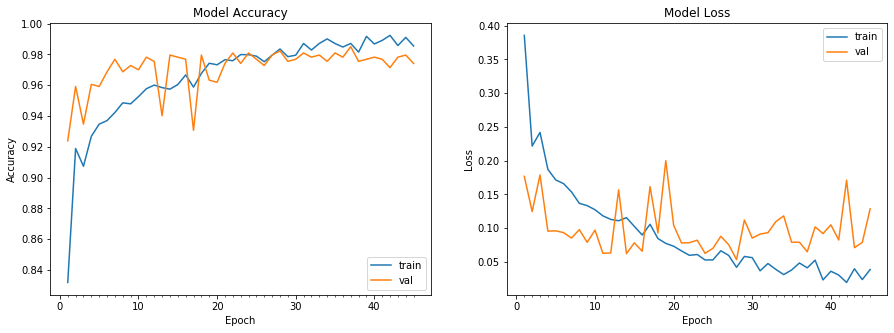

In [36]:
plot_model_history(model_info)

In [38]:
model.load_weights('face_detection.h5')

In [12]:
import cv2

mask_dict = {0 : 'with_mask' , 1 : 'without_mask'}

cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID') 
out = cv2.VideoWriter('output_new1.avi', fourcc, 20.0, (640, 480)) 

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
        
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    R,G,B = frame.split(frame)
    
    final_frame = np.zeros(frame.shape[:2] , dtype='uint8')
    

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [41]:
import cv2

mask_dict = {1 : 'with_mask' , 0 : 'without_mask'}

cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID') 
out = cv2.VideoWriter('output_new1.avi', fourcc, 20.0, (640, 480)) 

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
        
    
    #facecasc = facecasc.load('haarcascade_frontalface_default.xml')
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #colored = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)
    faces = facecasc.detectMultiScale(frame,scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        #roi_gray = gray[y:y + h, x:x + w]
        #roi_colored = cv2.cvtColor(roi_gray , cv2.COLOR_GRAY2RGB)
        final_frame = frame[y:y + h, x:x + w]
        final_frame = cv2.cvtColor(final_frame , cv2.COLOR_BGR2RGB)
        
       # print(roi_gray.shape)
        #cropped_img = np.expand_dims(np.expand_dims(cv2.resize(final_frame, (64, 64)), -1), 0)
        cropped_img = np.expand_dims(cv2.resize(final_frame, (64, 64)), 0)
        
        #print(cropped_img.shape)
        #cropped_img = np.expand_dims(cv2.resize(roi_gray, (64, 64)), 0)
        #print(cropped_img.shape)
        
        #cropped_img = np.expand_dims(cv2.resize(roi_colored , (64,64)), axis = -1)
        #cropped_img = np.expand_dims(cropped_img , axis = 0)
       # cropped_img = cv2.cvtColor(cropped_img , cv2.COLOR_GRAY2RGB)
        
        #print(cropped_img.shape)
        #cropped_img = np.expand_dims(cropped_img , axis =0 )
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame , mask_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
        out.write(frame)

    cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
out.release()
cv2.destroyAllWindows()